<a href="https://colab.research.google.com/github/KaishvaShah/EE610_ImageProcessing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

(1280, 960, 3)


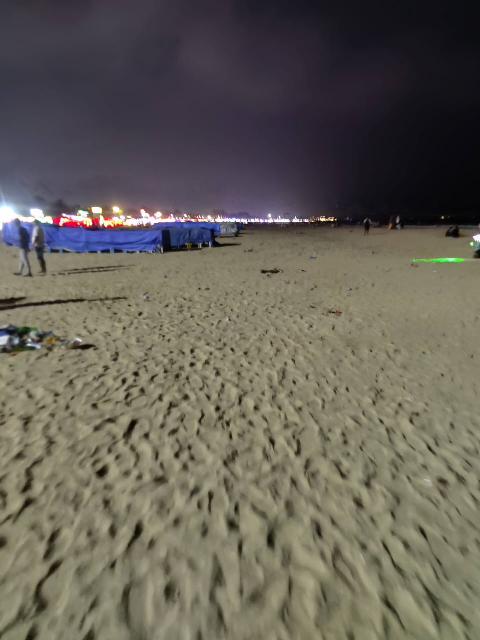

(640, 480, 3)


In [44]:
img=cv2.imread('/content/Q1.jpeg')
print(img.shape)
img1 = cv2.resize(img, (480, 640),
               interpolation = cv2.INTER_NEAREST)
#https://www.geeksforgeeks.org/image-resizing-using-opencv-python/ used to resize the original image of 1280x720 to 640x480 using opencv
cv2_imshow(img1)
print(img1.shape)

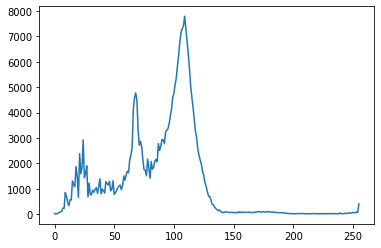

In [45]:
from matplotlib import pyplot as plt
#cv2.calcHist(images, channels, mask, histSize, ranges)
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
#Plotting the histograms for the black and white image

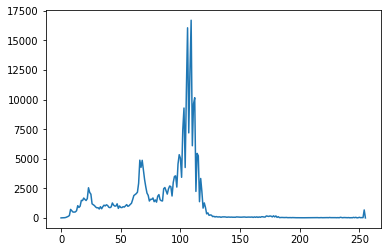

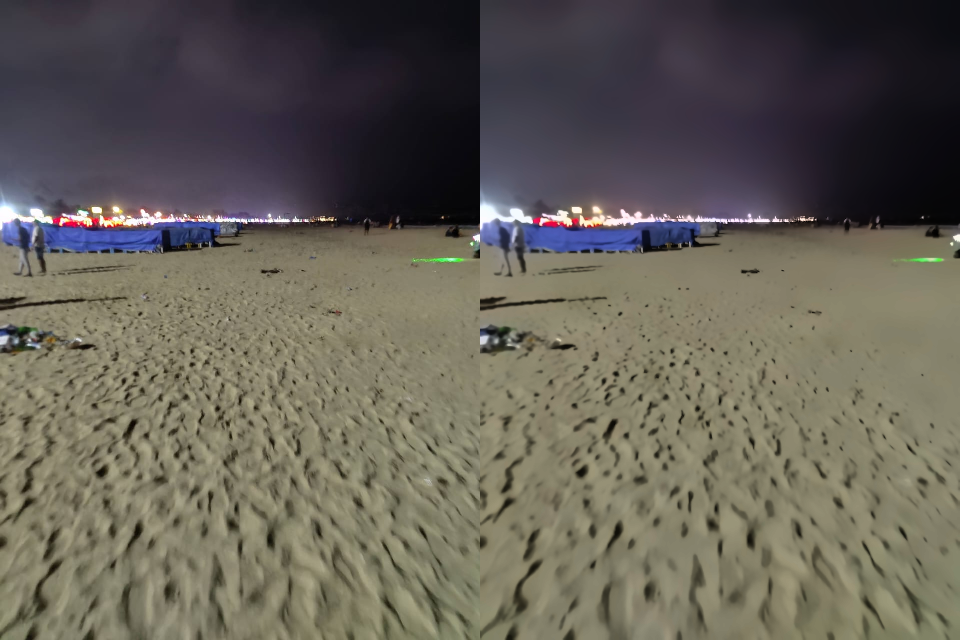

In [61]:
dst = cv2.fastNlMeansDenoisingColored(img1, None, 11, 11, 3, 21)
hist = cv2.calcHist([dst],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
horizontal_concat = np.concatenate((img1, dst), axis=1)
cv2_imshow(horizontal_concat)

As you can see the image has a much better histogram as we have removed the noise (gaussian) to some extent.